#Food Delivery Time Prediction Project By Kirti Pogra



###1. Importing Necessary Libraries


In [1]:
# import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

###2. Importing Data

In [7]:
train = pd.read_csv('/content/train.csv')
X_test = pd.read_csv('/content/test.csv')
y_test= pd.read_csv('/content/Sample_Submission.csv')

###3. Data Exploration and Cleaning

In [8]:
train.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

In [10]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Restaurant_latitude,45593.0,17.017729,8.185109,-30.905562,12.933284,18.546947,22.728163,30.914057
Restaurant_longitude,45593.0,70.231332,22.883647,-88.366217,73.170000,75.898497,78.044095,88.433452
Delivery_location_latitude,45593.0,17.465186,7.335122,0.010000,12.988453,18.633934,22.785049,31.054057
Delivery_location_longitude,45593.0,70.845702,21.118812,0.010000,73.280000,76.002574,78.107044,88.563452
Vehicle_condition,45593.0,1.023359,0.839065,0.000000,0.000000,1.000000,2.000000,3.000000


In [11]:
train.shape

(45593, 20)

In [12]:
pattern = r'\((?:min)\)\s*(\d+)'
train['Time_taken(min)'] = train['Time_taken(min)'].str.extract(pattern).astype(float)

In [13]:
train['Delivery_person_Ratings'].value_counts()

4.8     7148
4.7     7142
4.9     7041
4.6     6940
5       3996
4.5     3303
NaN     1908
4.1     1430
4.2     1418
4.3     1409
4.4     1361
4       1077
3.5      249
3.8      228
3.7      225
3.6      207
3.9      197
6         53
1         38
3.4       32
3.1       29
3.2       29
3.3       25
2.6       22
2.7       22
2.5       20
2.8       19
2.9       19
3          6
Name: Delivery_person_Ratings, dtype: int64

In [14]:
# replacing NaN with real none value because this is misleading
train['Delivery_person_Ratings'] = train['Delivery_person_Ratings'].replace('NaN ', np.nan)
X_test['Delivery_person_Ratings'] = X_test['Delivery_person_Ratings'].replace('NaN ', np.nan)

# finding mean value
mean_rating = train['Delivery_person_Ratings'].astype(float).mean()
print(mean_rating)

4.633780473846858


In [15]:
# now fill all the NaN value with the mean
train['Delivery_person_Ratings'] = train['Delivery_person_Ratings'].fillna(mean_rating)
X_test['Delivery_person_Ratings'] = X_test['Delivery_person_Ratings'].fillna(mean_rating)

In [16]:
train['Delivery_person_Ratings'] = train['Delivery_person_Ratings'].astype(float)
X_test['Delivery_person_Ratings'] = X_test['Delivery_person_Ratings'].astype(float)

In [17]:
train['Delivery_person_Ratings'].value_counts()

4.80000    7148
4.70000    7142
4.90000    7041
4.60000    6940
5.00000    3996
4.50000    3303
4.63378    1908
4.10000    1430
4.20000    1418
4.30000    1409
4.40000    1361
4.00000    1077
3.50000     249
3.80000     228
3.70000     225
3.60000     207
3.90000     197
6.00000      53
1.00000      38
3.40000      32
3.10000      29
3.20000      29
3.30000      25
2.60000      22
2.70000      22
2.50000      20
2.80000      19
2.90000      19
3.00000       6
Name: Delivery_person_Ratings, dtype: int64

In [18]:
train[train['ID']=="0x4f0 "]

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
42,0x4f0,MUMRES17DEL02,NaN,4.63378,19.121999,72.908493,19.201999,72.988493,06-04-2022,NaN,18:35:00,conditions Cloudy,Medium,1,Drinks,scooter,1,No,Metropolitian,33.0


In [19]:
mean_age = int(train[train['Delivery_person_Age']!='NaN ']['Delivery_person_Age'].astype(int).mean())
train['Delivery_person_Age'] = train['Delivery_person_Age'].replace('NaN ',mean_age)
X_test['Delivery_person_Age'] = X_test['Delivery_person_Age'].replace('NaN ',mean_age)


In [20]:
train['Delivery_person_Age'] = train['Delivery_person_Age'].astype(int)
X_test['Delivery_person_Age'] = X_test['Delivery_person_Age'].astype(int)

In [21]:
X_test['Delivery_person_Age'].value_counts()

29    1039
30     579
28     569
33     556
20     555
38     551
21     549
37     549
34     547
35     547
26     545
32     545
24     544
27     543
23     541
39     536
31     535
22     522
36     521
25     507
50      10
15       9
Name: Delivery_person_Age, dtype: int64

In [22]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Delivery_person_Age,45593.0,29.544075,5.696793,15.000000,25.000000,29.000000,34.000000,50.000000
Delivery_person_Ratings,45593.0,4.633780,0.327638,1.000000,4.600000,4.700000,4.800000,6.000000
Restaurant_latitude,45593.0,17.017729,8.185109,-30.905562,12.933284,18.546947,22.728163,30.914057
Restaurant_longitude,45593.0,70.231332,22.883647,-88.366217,73.170000,75.898497,78.044095,88.433452
Delivery_location_latitude,45593.0,17.465186,7.335122,0.010000,12.988453,18.633934,22.785049,31.054057
Delivery_location_longitude,45593.0,70.845702,21.118812,0.010000,73.280000,76.002574,78.107044,88.563452
Vehicle_condition,45593.0,1.023359,0.839065,0.000000,0.000000,1.000000,2.000000,3.000000
Time_taken(min),45593.0,26.294607,9.383806,10.000000,19.000000,26.000000,32.000000,54.000000


In [23]:
train['City'].replace("NaN ",None,inplace=True)
X_test['City'].replace("NaN ",None,inplace=True)

most_frequent = train['City'].mode()[0]
train['City'] = train['City'].fillna(most_frequent)
X_test['City'] = X_test['City'].fillna(most_frequent)

In [24]:
train['Festival'].replace("NaN ",None,inplace=True)
X_test['Festival'].replace("NaN ",None,inplace=True)

m = train['Festival'].mode()[0]
train['Festival'] = train['Festival'].fillna(m)
X_test['Festival'] = X_test['Festival'].fillna(m)

In [25]:
train['Festival'].unique()

array(['No ', 'Yes '], dtype=object)

In [26]:
m = train['Weatherconditions'].mode()[0]
train['Weatherconditions'] = train['Weatherconditions'].replace('conditions NaN',m) # this is also misleading feel like we don't have none value
X_test['Weatherconditions'] = X_test['Weatherconditions'].replace('conditions NaN',m)

In [27]:
train['Weatherconditions'].unique()

array(['conditions Sunny', 'conditions Stormy', 'conditions Sandstorms',
       'conditions Cloudy', 'conditions Fog', 'conditions Windy'],
      dtype=object)

In [28]:
m = train['multiple_deliveries'].mode()[0]

train['multiple_deliveries'] = train['multiple_deliveries'].replace('NaN ',m)
X_test['multiple_deliveries'] = X_test['multiple_deliveries'].replace('NaN ',m)

train['multiple_deliveries'] = train['multiple_deliveries'].astype(int)
X_test['multiple_deliveries'] = X_test['multiple_deliveries'].astype(int)

In [29]:
m = train['Road_traffic_density'].mode()[0]
train['Road_traffic_density'] = train['Road_traffic_density'].replace('NaN ',m)
X_test['Road_traffic_density'] = X_test['Road_traffic_density'].replace('NaN ',m)
train['Road_traffic_density'].value_counts()

Low        16078
Jam        14143
Medium     10947
High        4425
Name: Road_traffic_density, dtype: int64

In [30]:
# replacing jam with high because they are almost same high road traffic density mean jam
train['Road_traffic_density'].replace('Jam ','High ',inplace=True)
X_test['Road_traffic_density'].replace('Jam ','High ',inplace=True)

###4. Feature Engineering

In [31]:
# extracting city code from delivery person ID
pattern = r'([^;]*)RES'
train['City_code'] = train['Delivery_person_ID'].str.extract(pattern)
X_test['City_code'] = X_test['Delivery_person_ID'].str.extract(pattern)

In [32]:
train['City_code'].value_counts()

JAP       3443
RANCHI    3229
BANG      3195
SUR       3187
HYD       3181
MUM       3173
MYS       3171
COIMB     3170
VAD       3166
INDO      3159
CHEN      3145
PUNE      3132
AGR        763
LUDH       758
ALH        740
KNP        740
DEH        737
GOA        709
AURG       703
KOC        701
KOL        700
BHP        691
Name: City_code, dtype: int64

In [33]:
# using this function, i will create a new feature prepare time
from datetime import timedelta
def create_prepare_time(df):
  # Convert string columns to datetime
  df['Time_Orderd'].replace('NaN ',None,inplace=True)
  df['Time_Order_picked'].replace('NaN ',None,inplace=True)

  df['Time_Orderd'] = pd.to_datetime(df['Time_Orderd'])
  df['Time_Order_picked'] = pd.to_datetime(df['Time_Order_picked'])

  # Calculate prepare_time
  df['prepare_time (min)'] = df.apply(find_dif,axis=1)

def find_dif(row):

  if pd.isnull(row['Time_Orderd']) or pd.isnull(row['Time_Order_picked']):
    return None
  elif row['Time_Order_picked'] >= row['Time_Orderd']:
    return (row['Time_Order_picked'] - row['Time_Orderd']).seconds/60
  else:
    row['Time_Order_picked'] += timedelta(days=1)
    return (row['Time_Order_picked'] - row['Time_Orderd']).seconds/60


In [34]:
create_prepare_time(train)
create_prepare_time(X_test)

train[train['prepare_time (min)'].isnull()][['prepare_time (min)','Time_Orderd','Time_Order_picked']].head()

,prepare_time (min),Time_Orderd,Time_Order_picked
42,NaN,NaT,2024-03-24 18:35:00
74,NaN,NaT,2024-03-24 15:30:00
120,NaN,NaT,2024-03-24 18:25:00
140,NaN,NaT,2024-03-24 23:40:00
179,NaN,NaT,2024-03-24 17:50:00


In [35]:
m = train['prepare_time (min)'].median()
train.fillna({'prepare_time (min)':m},inplace=True)
X_test.fillna({'prepare_time (min)':m},inplace=True)
train[train['prepare_time (min)'].isnull()][['prepare_time (min)','Time_Orderd','Time_Order_picked']].head()

,prepare_time (min),Time_Orderd,Time_Order_picked


In [36]:
train['prepare_time (min)'].value_counts()

10.0    16280
5.0     14703
15.0    14610
Name: prepare_time (min), dtype: int64

In [37]:
# finding distance using latitude and longitude of both location( Restaurant and Delivery)
from geopy.distance import geodesic
train['distance (km)'] = train.apply(lambda row: geodesic((row['Restaurant_latitude'], row['Restaurant_longitude']), (row['Delivery_location_latitude'], row['Delivery_location_longitude'])).km, axis=1)
X_test['distance (km)'] = X_test.apply(lambda row: geodesic((row['Restaurant_latitude'], row['Restaurant_longitude']), (row['Delivery_location_latitude'], row['Delivery_location_longitude'])).km, axis=1)


In [38]:
train.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),City_code,prepare_time (min),distance (km)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,2024-03-24 11:30:00,...,2,Snack,motorcycle,0,No,Urban,24.0,INDO,15.0,3.020737
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,2024-03-24 19:45:00,...,2,Snack,scooter,1,No,Metropolitian,33.0,BANG,5.0,20.143737
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,2024-03-24 08:30:00,...,0,Drinks,motorcycle,1,No,Urban,26.0,BANG,15.0,1.549693
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,2024-03-24 18:00:00,...,0,Buffet,motorcycle,1,No,Metropolitian,21.0,COIMB,10.0,7.774497
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,2024-03-24 13:30:00,...,1,Snack,scooter,1,No,Metropolitian,30.0,CHEN,15.0,6.197898


In [39]:
train.drop(columns = ['ID','Delivery_person_ID','Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude','Time_Orderd','Time_Order_picked'], inplace=True)

In [40]:
X_test.drop(columns = ['ID','Delivery_person_ID','Restaurant_latitude','Time_Orderd','Time_Order_picked','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude'], inplace=True)

In [41]:
train['multiple_deliveries'].value_counts()

1    29152
0    14095
2     1985
3      361
Name: multiple_deliveries, dtype: int64

In [42]:
train['Road_traffic_density'].value_counts()

High       18568
Low        16078
Medium     10947
Name: Road_traffic_density, dtype: int64

In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Delivery_person_Age      45593 non-null  int64  
 1   Delivery_person_Ratings  45593 non-null  float64
 2   Order_Date               45593 non-null  object 
 3   Weatherconditions        45593 non-null  object 
 4   Road_traffic_density     45593 non-null  object 
 5   Vehicle_condition        45593 non-null  int64  
 6   Type_of_order            45593 non-null  object 
 7   Type_of_vehicle          45593 non-null  object 
 8   multiple_deliveries      45593 non-null  int64  
 9   Festival                 45593 non-null  object 
 10  City                     45593 non-null  object 
 11  Time_taken(min)          45593 non-null  float64
 12  City_code                45593 non-null  object 
 13  prepare_time (min)       45593 non-null  float64
 14  distance (km)         

In [44]:
train['Order_Date'] = pd.to_datetime(train['Order_Date'])
X_test['Order_Date'] = pd.to_datetime(X_test['Order_Date'])


# Check if the day of the week is Saturday (5) or Sunday (6)
train['Is_Weekend'] = train['Order_Date'].dt.dayofweek.isin([5, 6])
X_test['Is_Weekend'] = X_test['Order_Date'].dt.dayofweek.isin([5,6])

<ipython-input-44-c66d404d3ae7>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  train['Order_Date'] = pd.to_datetime(train['Order_Date'])
<ipython-input-44-c66d404d3ae7>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  X_test['Order_Date'] = pd.to_datetime(X_test['Order_Date'])


In [45]:
# Get the week number for each date
train['Week'] = train['Order_Date'].dt.isocalendar().week
X_test['Week'] = X_test['Order_Date'].dt.isocalendar().week

train['Next Month'] = (train['Order_Date'] + pd.DateOffset(weeks=1)).dt.month
train['Is Last Week of Month'] = (train['Order_Date'].dt.month != train['Next Month'])

X_test['Next Month'] = (X_test['Order_Date'] + pd.DateOffset(weeks=1)).dt.month
X_test['Is Last Week of Month'] = (X_test['Order_Date'].dt.month != X_test['Next Month'])


In [46]:
train.drop(columns=['Order_Date','Week','Next Month'],inplace=True)
X_test.drop(columns=['Order_Date','Week','Next Month'],inplace=True)

In [47]:
X_test.head()

,Delivery_person_Age,Delivery_person_Ratings,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,City_code,prepare_time (min),distance (km),Is_Weekend,Is Last Week of Month
0,29,4.63378,conditions Fog,Low,3,Drinks,electric_scooter,1,No,Metropolitian,COIMB,10.0,6.219648,False,True
1,28,4.60000,conditions Windy,High,0,Snack,motorcycle,1,No,Metropolitian,BANG,5.0,17.042985,False,True
2,23,4.50000,conditions Stormy,High,0,Drinks,motorcycle,1,No,Metropolitian,JAP,10.0,13.390474,False,False
3,21,4.80000,conditions Fog,Medium,1,Meal,scooter,1,No,Metropolitian,JAP,5.0,13.397932,False,False
4,31,4.60000,conditions Sunny,Medium,2,Drinks,scooter,1,No,Metropolitian,CHEN,15.0,17.042634,True,True


In [48]:
#train.drop_duplicates(inplace=True)
train.duplicated().sum()


0

In [46]:
#!pip install ydata-profiling
#!pip install --upgrade matplotlib

import matplotlib

matplotlib.use('Agg')
from ydata_profiling import ProfileReport

profile = ProfileReport(train, title='Pandas Profiling Report On train', explorative=True)
profile.to_file("train.html")

profile = ProfileReport(X_test, title='Pandas Profiling Report On X_test', explorative=True)
profile.to_file("X_test.html")


/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:354: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/ydata_profiling/model/correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'could not convert string to float: 'Urban '')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:354: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/ydata_profiling/model/correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'could not convert string to float: 'Metropolitian '')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [49]:
train.info() #finally we can say that we don't have any none value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Delivery_person_Age      45593 non-null  int64  
 1   Delivery_person_Ratings  45593 non-null  float64
 2   Weatherconditions        45593 non-null  object 
 3   Road_traffic_density     45593 non-null  object 
 4   Vehicle_condition        45593 non-null  int64  
 5   Type_of_order            45593 non-null  object 
 6   Type_of_vehicle          45593 non-null  object 
 7   multiple_deliveries      45593 non-null  int64  
 8   Festival                 45593 non-null  object 
 9   City                     45593 non-null  object 
 10  Time_taken(min)          45593 non-null  float64
 11  City_code                45593 non-null  object 
 12  prepare_time (min)       45593 non-null  float64
 13  distance (km)            45593 non-null  float64
 14  Is_Weekend            

###Data Preprocessing


In [50]:
from sklearn.preprocessing import MinMaxScaler

age_scaler = MinMaxScaler()

age_scaler.fit(train[['Delivery_person_Age']])

train['Delivery_person_Age_scaled'] = age_scaler.transform(train[['Delivery_person_Age']])
X_test['Delivery_person_Age_scaled'] = age_scaler.transform(X_test[['Delivery_person_Age']])


In [51]:
from sklearn.preprocessing import StandardScaler
distance_scaler =  StandardScaler()

distance_scaler.fit(train[['distance (km)']])

train['Distance_scaled'] = distance_scaler.transform(train[['distance (km)']])
X_test['Distance_scaled'] = distance_scaler.transform(X_test[['distance (km)']])

In [52]:
train.head()

,Delivery_person_Age,Delivery_person_Ratings,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),City_code,prepare_time (min),distance (km),Is_Weekend,Is Last Week of Month,Delivery_person_Age_scaled,Distance_scaled
0,37,4.9,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,24.0,INDO,15.0,3.020737,True,False,0.628571,-0.087442
1,34,4.5,conditions Stormy,High,2,Snack,scooter,1,No,Metropolitian,33.0,BANG,5.0,20.143737,False,True,0.542857,-0.071874
2,23,4.4,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,26.0,BANG,15.0,1.549693,True,False,0.228571,-0.088779
3,38,4.7,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,21.0,COIMB,10.0,7.774497,False,False,0.657143,-0.083120
4,32,4.6,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,30.0,CHEN,15.0,6.197898,True,True,0.485714,-0.084553


In [53]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Delivery_person_Age,45593.0,2.954407e+01,5.696793,15.000000,25.000000,29.000000,34.000000,50.000000
Delivery_person_Ratings,45593.0,4.633780e+00,0.327638,1.000000,4.600000,4.700000,4.800000,6.000000
Vehicle_condition,45593.0,1.023359e+00,0.839065,0.000000,0.000000,1.000000,2.000000,3.000000
multiple_deliveries,45593.0,7.502248e-01,0.567430,0.000000,0.000000,1.000000,1.000000,3.000000
Time_taken(min),45593.0,2.629461e+01,9.383806,10.000000,19.000000,26.000000,32.000000,54.000000
prepare_time (min),45593.0,9.989801e+00,4.009169,5.000000,5.000000,10.000000,15.000000,15.000000
distance (km),45593.0,9.919895e+01,1099.925157,1.463837,4.654185,9.247024,13.740932,19709.575543
Delivery_person_Age_scaled,45593.0,4.155450e-01,0.162766,0.000000,0.285714,0.400000,0.542857,1.000000
Distance_scaled,45593.0,-3.896117e-18,1.000011,-0.088857,-0.085957,-0.081781,-0.077695,17.829024


In [54]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Delivery_person_Age         45593 non-null  int64  
 1   Delivery_person_Ratings     45593 non-null  float64
 2   Weatherconditions           45593 non-null  object 
 3   Road_traffic_density        45593 non-null  object 
 4   Vehicle_condition           45593 non-null  int64  
 5   Type_of_order               45593 non-null  object 
 6   Type_of_vehicle             45593 non-null  object 
 7   multiple_deliveries         45593 non-null  int64  
 8   Festival                    45593 non-null  object 
 9   City                        45593 non-null  object 
 10  Time_taken(min)             45593 non-null  float64
 11  City_code                   45593 non-null  object 
 12  prepare_time (min)          45593 non-null  float64
 13  distance (km)               455

In [55]:

from sklearn.preprocessing import OneHotEncoder

def one_hot_encoding(train,X_test,col, name):
  OHE = OneHotEncoder()
  OHE.fit(train[[col]])

  train_encoded = OHE.transform(train[[col]]).toarray()
  X_test_encoded = OHE.transform(X_test[[col]]).toarray()

  train = pd.concat([train, pd.DataFrame(train_encoded,columns=name)],axis =1)
  X_test = pd.concat([X_test, pd.DataFrame(X_test_encoded,columns=name)], axis=1)
  return train, X_test

In [56]:
column_name = ['WeatherSunny', 'WeatherStormy', 'WeatherSandstorms',
       'WeatherCloudy', 'WeatherFog', 'WeatherWindy']
train,X_test = one_hot_encoding(train,X_test,'Weatherconditions',column_name)

In [57]:
column_name = ['VehicleMotorcycle ', 'VehicleScooter ', 'VehicleElectric_scooter ', 'VehicleBicycle ']
train,X_test = one_hot_encoding(train,X_test,'Type_of_vehicle',column_name)

In [58]:
column_name = ['CityUrban ', 'CityMetropolitian ', 'CitySemiUrban ']
train,X_test = one_hot_encoding(train,X_test,'City',column_name)

In [59]:
column_name = ['OrderSnack ', 'OrderDrinks ', 'OrderBuffet ', 'OrderMeal ']
train,X_test = one_hot_encoding(train,X_test,'Type_of_order',column_name)

In [60]:
column_name = ['City_code_INDO', 'City_code_BANG', 'City_code_COIMB', 'City_code_CHEN', 'City_code_HYD',
               'City_code_RANCHI', 'City_code_MYS', 'City_code_DEH', 'City_code_KOC',
               'City_code_PUNE', 'City_code_LUDH', 'City_code_KNP', 'City_code_MUM', 'City_code_KOL',
               'City_code_JAP', 'City_code_SUR', 'City_code_GOA', 'City_code_AURG', 'City_code_AGR',
               'City_code_VAD', 'City_code_ALH', 'City_code_BHP']
train,X_test = one_hot_encoding(train,X_test,'City_code',column_name)

In [61]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Delivery_person_Age         45593 non-null  int64  
 1   Delivery_person_Ratings     45593 non-null  float64
 2   Weatherconditions           45593 non-null  object 
 3   Road_traffic_density        45593 non-null  object 
 4   Vehicle_condition           45593 non-null  int64  
 5   Type_of_order               45593 non-null  object 
 6   Type_of_vehicle             45593 non-null  object 
 7   multiple_deliveries         45593 non-null  int64  
 8   Festival                    45593 non-null  object 
 9   City                        45593 non-null  object 
 10  Time_taken(min)             45593 non-null  float64
 11  City_code                   45593 non-null  object 
 12  prepare_time (min)          45593 non-null  float64
 13  distance (km)               455

In [62]:
from sklearn.preprocessing import LabelEncoder

def encoding(col):
  encoder = LabelEncoder()

  encoder.fit(train[col])
  train[col+'_encoded'] = encoder.transform(train[col])
  X_test[col+'_encoded'] = encoder.transform(X_test[col])



In [63]:
train.columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Weatherconditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City',
       'Time_taken(min)', 'City_code', 'prepare_time (min)', 'distance (km)',
       'Is_Weekend', 'Is Last Week of Month', 'Delivery_person_Age_scaled',
       'Distance_scaled', 'WeatherSunny', 'WeatherStormy', 'WeatherSandstorms',
       'WeatherCloudy', 'WeatherFog', 'WeatherWindy', 'VehicleMotorcycle ',
       'VehicleScooter ', 'VehicleElectric_scooter ', 'VehicleBicycle ',
       'CityUrban ', 'CityMetropolitian ', 'CitySemiUrban ', 'OrderSnack ',
       'OrderDrinks ', 'OrderBuffet ', 'OrderMeal ', 'City_code_INDO',
       'City_code_BANG', 'City_code_COIMB', 'City_code_CHEN', 'City_code_HYD',
       'City_code_RANCHI', 'City_code_MYS', 'City_code_DEH', 'City_code_KOC',
       'City_code_PUNE', 'City_code_LUDH', 'City_code_KNP', 'City_code_MUM',
       'City_code_KO

In [64]:
train['Festival'].replace('NaN ','No ',inplace=True)
X_test['Festival'].replace('NaN ','No ',inplace=True)

In [65]:
encoding('Road_traffic_density')
encoding('Is_Weekend')
encoding('Is Last Week of Month')
encoding('Festival')


In [66]:
train.columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Weatherconditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City',
       'Time_taken(min)', 'City_code', 'prepare_time (min)', 'distance (km)',
       'Is_Weekend', 'Is Last Week of Month', 'Delivery_person_Age_scaled',
       'Distance_scaled', 'WeatherSunny', 'WeatherStormy', 'WeatherSandstorms',
       'WeatherCloudy', 'WeatherFog', 'WeatherWindy', 'VehicleMotorcycle ',
       'VehicleScooter ', 'VehicleElectric_scooter ', 'VehicleBicycle ',
       'CityUrban ', 'CityMetropolitian ', 'CitySemiUrban ', 'OrderSnack ',
       'OrderDrinks ', 'OrderBuffet ', 'OrderMeal ', 'City_code_INDO',
       'City_code_BANG', 'City_code_COIMB', 'City_code_CHEN', 'City_code_HYD',
       'City_code_RANCHI', 'City_code_MYS', 'City_code_DEH', 'City_code_KOC',
       'City_code_PUNE', 'City_code_LUDH', 'City_code_KNP', 'City_code_MUM',
       'City_code_KO

In [67]:
train.drop(columns=['Delivery_person_Age','City','Weatherconditions',
       'Road_traffic_density', 'Type_of_order',
       'Type_of_vehicle','City_code','Is_Weekend'	,'Is Last Week of Month','Festival','distance (km)'],inplace=True)

X_test.drop(columns=['Delivery_person_Age','City','Weatherconditions',
       'Road_traffic_density', 'Type_of_order',
       'Type_of_vehicle','City_code','Is_Weekend'	,'Is Last Week of Month','Festival','distance (km)'],inplace=True)

In [68]:
X_test.columns

Index(['Delivery_person_Ratings', 'Vehicle_condition', 'multiple_deliveries',
       'prepare_time (min)', 'Delivery_person_Age_scaled', 'Distance_scaled',
       'WeatherSunny', 'WeatherStormy', 'WeatherSandstorms', 'WeatherCloudy',
       'WeatherFog', 'WeatherWindy', 'VehicleMotorcycle ', 'VehicleScooter ',
       'VehicleElectric_scooter ', 'VehicleBicycle ', 'CityUrban ',
       'CityMetropolitian ', 'CitySemiUrban ', 'OrderSnack ', 'OrderDrinks ',
       'OrderBuffet ', 'OrderMeal ', 'City_code_INDO', 'City_code_BANG',
       'City_code_COIMB', 'City_code_CHEN', 'City_code_HYD',
       'City_code_RANCHI', 'City_code_MYS', 'City_code_DEH', 'City_code_KOC',
       'City_code_PUNE', 'City_code_LUDH', 'City_code_KNP', 'City_code_MUM',
       'City_code_KOL', 'City_code_JAP', 'City_code_SUR', 'City_code_GOA',
       'City_code_AURG', 'City_code_AGR', 'City_code_VAD', 'City_code_ALH',
       'City_code_BHP', 'Road_traffic_density_encoded', 'Is_Weekend_encoded',
       'Is Last Week of 

In [69]:
train.head()

,Delivery_person_Ratings,Vehicle_condition,multiple_deliveries,Time_taken(min),prepare_time (min),Delivery_person_Age_scaled,Distance_scaled,WeatherSunny,WeatherStormy,WeatherSandstorms,...,City_code_GOA,City_code_AURG,City_code_AGR,City_code_VAD,City_code_ALH,City_code_BHP,Road_traffic_density_encoded,Is_Weekend_encoded,Is Last Week of Month_encoded,Festival_encoded
0,4.9,2,0,24.0,15.0,0.628571,-0.087442,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0
1,4.5,2,1,33.0,5.0,0.542857,-0.071874,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0
2,4.4,0,1,26.0,15.0,0.228571,-0.088779,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0
3,4.7,0,1,21.0,10.0,0.657143,-0.083120,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,0,0,0
4,4.6,1,1,30.0,15.0,0.485714,-0.084553,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0


In [70]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 50 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Delivery_person_Ratings        45593 non-null  float64
 1   Vehicle_condition              45593 non-null  int64  
 2   multiple_deliveries            45593 non-null  int64  
 3   Time_taken(min)                45593 non-null  float64
 4   prepare_time (min)             45593 non-null  float64
 5   Delivery_person_Age_scaled     45593 non-null  float64
 6   Distance_scaled                45593 non-null  float64
 7   WeatherSunny                   45593 non-null  float64
 8   WeatherStormy                  45593 non-null  float64
 9   WeatherSandstorms              45593 non-null  float64
 10  WeatherCloudy                  45593 non-null  float64
 11  WeatherFog                     45593 non-null  float64
 12  WeatherWindy                   45593 non-null 

In [71]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11399 entries, 0 to 11398
Data columns (total 49 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Delivery_person_Ratings        11399 non-null  float64
 1   Vehicle_condition              11399 non-null  int64  
 2   multiple_deliveries            11399 non-null  int64  
 3   prepare_time (min)             11399 non-null  float64
 4   Delivery_person_Age_scaled     11399 non-null  float64
 5   Distance_scaled                11399 non-null  float64
 6   WeatherSunny                   11399 non-null  float64
 7   WeatherStormy                  11399 non-null  float64
 8   WeatherSandstorms              11399 non-null  float64
 9   WeatherCloudy                  11399 non-null  float64
 10  WeatherFog                     11399 non-null  float64
 11  WeatherWindy                   11399 non-null  float64
 12  VehicleMotorcycle              11399 non-null 

###Model Building and Evaluation

In [72]:
X_train = train.drop(columns='Time_taken(min)')
y_train = train['Time_taken(min)']

In [73]:
X_test.shape

(11399, 49)

In [74]:
y_test.drop(columns='ID',inplace=True)
y_test.shape

(11399, 1)

In [75]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [76]:
# Finalized XGBoost because only this algorithm give best result among all other I tried
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
xg = xgb.XGBRegressor()
'''
param_grid= [
    {'max_depth':[2,5,6,10],'n_estimators':[2,4,8,10],'learning_rate':[0.01,0.1,1]}
]
grid_search = GridSearchCV(xg, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

print(f"{xg.__class__.__name__}:")
print("Best parameters:", grid_search.best_params_)
print("Best R2 score:", grid_search.best_score_)
print()
'''
#n_estimators=2, max_depth=2, learning_rate=1


xg.fit(X_train,y_train)
y_pred = xg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
print('Mean Squared Error:', mse)
print('R^2 Score:', r2)
print('Mean Absolue Error: ', mae)
print("RMSE",np.sqrt(mse))

Mean Squared Error: 4.473027768910621
R^2 Score: 0.9367296966040181
Mean Absolue Error:  1.5311236576125276
RMSE 2.1149533727509504


In [77]:
X_test.columns

Index(['Delivery_person_Ratings', 'Vehicle_condition', 'multiple_deliveries',
       'prepare_time (min)', 'Delivery_person_Age_scaled', 'Distance_scaled',
       'WeatherSunny', 'WeatherStormy', 'WeatherSandstorms', 'WeatherCloudy',
       'WeatherFog', 'WeatherWindy', 'VehicleMotorcycle ', 'VehicleScooter ',
       'VehicleElectric_scooter ', 'VehicleBicycle ', 'CityUrban ',
       'CityMetropolitian ', 'CitySemiUrban ', 'OrderSnack ', 'OrderDrinks ',
       'OrderBuffet ', 'OrderMeal ', 'City_code_INDO', 'City_code_BANG',
       'City_code_COIMB', 'City_code_CHEN', 'City_code_HYD',
       'City_code_RANCHI', 'City_code_MYS', 'City_code_DEH', 'City_code_KOC',
       'City_code_PUNE', 'City_code_LUDH', 'City_code_KNP', 'City_code_MUM',
       'City_code_KOL', 'City_code_JAP', 'City_code_SUR', 'City_code_GOA',
       'City_code_AURG', 'City_code_AGR', 'City_code_VAD', 'City_code_ALH',
       'City_code_BHP', 'Road_traffic_density_encoded', 'Is_Weekend_encoded',
       'Is Last Week of 

In [78]:
testF = X_test.drop(columns='Festival_encoded')
trainF = X_train.drop(columns='Festival_encoded')

In [79]:
# just checking should I delete imbalance column or not
xgF = xgb.XGBRegressor()
xgF.fit(trainF,y_train)

y_pred = xgF.predict(testF)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
print('Mean Squared Error:', mse)
print('R^2 Score:', r2)
print('Mean Absolue Error: ', mae)
print("RMSE",np.sqrt(mse))

Mean Squared Error: 5.0960214098344085
R^2 Score: 0.9279175454814653
Mean Absolue Error:  1.6236588940739083
RMSE 2.257436911595628


In [80]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(xg, X_train, y_train, cv=5)  # 5-fold cross-validation
cv_scoresF = cross_val_score(xgF,trainF,y_train,cv=5)
# Print mean and standard deviation of cross-validation scores
print("Mean CV Score:", np.mean(cv_scores))
print("Std CV Score:", np.std(cv_scores))

print("without festival feature:")
print("Mean CV Score:", np.mean(cv_scoresF))
print("Std CV Score:", np.std(cv_scoresF))

Mean CV Score: 0.8171901109236807
Std CV Score: 0.0014339419646251874
without festival feature:
Mean CV Score: 0.8107988892066444
Std CV Score: 0.0018059622025903526


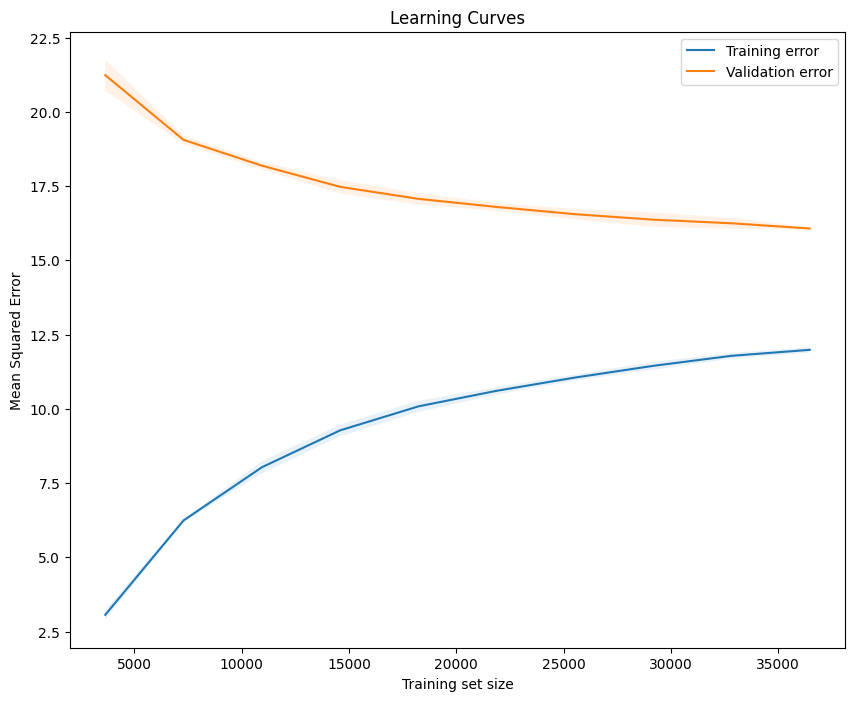

In [81]:
# going with festival feature
from sklearn.model_selection import learning_curve
model = xgb.XGBRegressor()
# Plot learning curves
train_sizes, train_scores, val_scores = learning_curve(
    estimator=model,
    X=X_train,
    y=y_train,
    shuffle=True,
    random_state = 42,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='neg_mean_squared_error'
)

# Calculate mean and standard deviation of scores
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = -np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 8))
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, val_scores_mean, label='Validation error')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1)
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1)
plt.xlabel('Training set size')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curves')
plt.legend()
plt.show()